

```
# Libararies
```



In [1]:
#import necessary libraries
#nltk.download()
!pip install nltk
!pip install -U scikit-learn
!pip install catboost
!pip install xgboost


import nltk
import random
import re
import pandas as pd
import numpy as np
import os
import seaborn as sns


from nltk.corpus import gutenberg
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score ,cross_validate,cross_val_predict

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
import seaborn as sns
from google.colab import files

from sklearn import preprocessing

nltk.download('stopwords')
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('wordnet')
from nltk import ngrams
stop_words = set(stopwords.words('english'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Preprocessing & Data Cleansing


In [2]:
# obtain the list of books by using .fileids() function.
listBooks = gutenberg.fileids()
listBooks

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
genre_books={}

# Get the author names and book titles for each drama book
for book in listBooks:
    # Extract the author name from the felid
    author_line = gutenberg.raw(book).split('\n')[0]
    author_name = author_line.split("by", 1)[-1].strip().replace("]", "").replace("by","")
    # Remove the year from the author name using regular expressions
    author_name = re.sub(r'\b\d{4}\b', '', author_name).strip()

    # Extract the book title from the felid
    title =book.split('/')[-1]
    
    # Check if the book is related to drama
    if 'history' in nltk.corpus.gutenberg.raw(book).lower():
      genre_books[title]=author_name

genre_books

{'austen-emma.txt': 'Jane Austen',
 'austen-persuasion.txt': 'Jane Austen',
 'austen-sense.txt': 'Jane Austen',
 'carroll-alice.txt': 'Lewis Carroll',
 'chesterton-ball.txt': 'G.K. Chesterton',
 'chesterton-brown.txt': 'G. K. Chesterton',
 'chesterton-thursday.txt': 'G. K. Chesterton',
 'edgeworth-parents.txt': 'Maria Edgeworth',
 'melville-moby_dick.txt': 'Dick  Herman Melville',
 'shakespeare-caesar.txt': 'William Shakespeare',
 'shakespeare-hamlet.txt': 'William Shakespeare',
 'whitman-leaves.txt': 'Walt Whitman'}

In [4]:
selected_books = []

#Get five differnet books with five differnet authors
def get_books(numberBooks):
    authors = set()

    while len(selected_books) < numberBooks:
        title, author = random.choice(list(genre_books.items()))
        if author not in authors:
            authors.add(author)
            selected_books.append(title)

    return selected_books
get_books(5)


['shakespeare-hamlet.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'chesterton-ball.txt',
 'austen-emma.txt']

In [5]:
selected_books=['austen-emma.txt','carroll-alice.txt','chesterton-brown.txt', 'edgeworth-parents.txt','shakespeare-hamlet.txt']
selected_books

['austen-emma.txt',
 'carroll-alice.txt',
 'chesterton-brown.txt',
 'edgeworth-parents.txt',
 'shakespeare-hamlet.txt']

In [6]:
def clean_text(text):

    #remove punctuation and strange characters
    lemmatizer = WordNetLemmatizer()
    sub_pattern = r'[^A-Za-z]'
    split_pattern = r"\s+"

    #remove stop words
    stop_words = stopwords.words('english') + ['never','ever','couldnot','wouldnot','could','would','us',"i'm","you'd"]

    # Converting all words into lower case.
    lower_book = text.lower()        

    # Replacing all characters except those in the pattern into spaces.                                      
    filtered_book = re.sub(sub_pattern,' ',lower_book).lstrip().rstrip() 

     # tokenizethe whole book into words in a list.
    filtered_book = word_tokenize(filtered_book)                     
    filtered_book = [lemmatizer.lemmatize(word) for word in filtered_book if word not in stop_words]

    return filtered_book

In [7]:
#label books Names with a unique label (even if there are more than 26 book)(book 27->aa)(book 28 -->ab)
book_map = {}
for i, book_name in enumerate(selected_books):
    label = chr(ord('a') + i)
    book_map[book_name] = label

In [8]:
def prepareBook( Partitons_num,num_of_words):
  
    df = pd.DataFrame(columns=["Partitions","Book Name","Book Label","Book Author"])
   
    for id,book in enumerate(selected_books):
        
        # import data from Gutenberg by using .raw() function
        raw_text = gutenberg.raw(book)

        #print(len(raw_text))

        #clean book Text
        cleaned_book= clean_text(raw_text)

        #print(len(cleaned_book))

        # tokenization of words (more then 3 chars ) by using word_tokenize() function.
        tokens = nltk.regexp_tokenize(str(cleaned_book), r'\w{3,}')
        data_Partition=[]
        seed=42
        # create (Partitons_num) random sample of number of words for each book.
        # use for loop
        for i in range(Partitons_num):
            
            # Use random.randint() function to randomly pick a start position for selecting the 150 words
            # Select num_of_word words from the start position
            start_pos = random.randint(0, len(tokens) - num_of_words)
      
            # divide the tokenized words into partitions and label the partitions
            partitions_tokens = tokens[start_pos:start_pos + num_of_words]

            #join all tokens in one sentence
            partitions = ' '.join(partitions_tokens)

            #data frame prepartion
            
            bookName = book.split('-')[1].capitalize()
            bookLabel=book_map[book]
            bookAuthor= genre_books[book]
           

            # use append function to label each Partion to the corresponding label (e.g., author name)
            df.loc[len(df)] = [partitions,bookName, bookLabel, bookAuthor]
    return df

In [9]:
df=prepareBook(200,100)
df

,Partitions,Book Name,Book Label,Book Author
0,interval course obliged formal orderly others ...,Emma.txt,a,Jane Austen
1,pianoforte immediately ready emma suspect aris...,Emma.txt,a,Jane Austen
2,jane fairfax apparently cherishing reprehensib...,Emma.txt,a,Jane Austen
3,think live without something musical society c...,Emma.txt,a,Jane Austen
4,old abbey fish pond perhaps get far clover beg...,Emma.txt,a,Jane Austen
...,...,...,...,...
995,sure brauery griefe put towring passion hor pe...,Hamlet.txt,e,William Shakespeare
996,someuer shent giue seales neuer soule consent ...,Hamlet.txt,e,William Shakespeare
997,ham hand king giue foyles yong osricke cousen ...,Hamlet.txt,e,William Shakespeare
998,life crowne queene dispatcht cut euen blossome...,Hamlet.txt,e,William Shakespeare


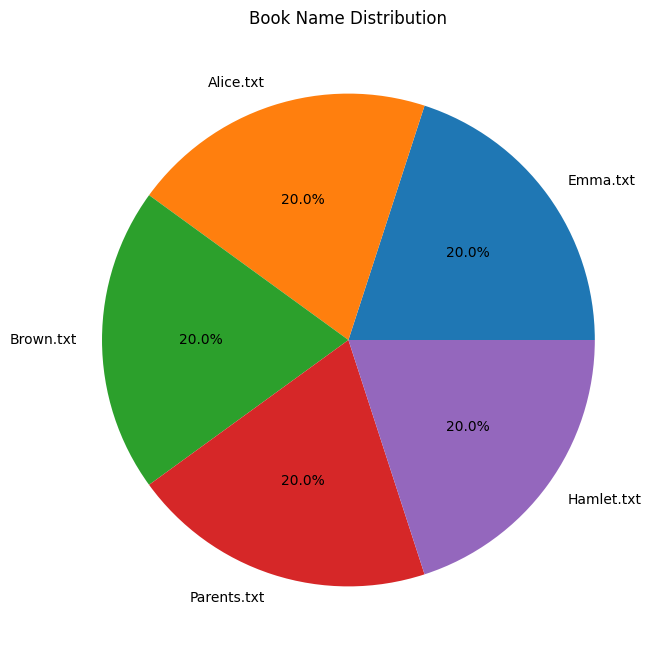

In [10]:
plt.figure(figsize=(10, 8))
book_counts = df['Book Name'].value_counts()
labels = book_counts.index
plt.pie(book_counts, labels=labels, autopct='%1.1f%%')
plt.title('Book Name Distribution')
plt.show()


In [11]:
#uploaded = files.upload()


 The most frequent 100 words of book Jane Austen



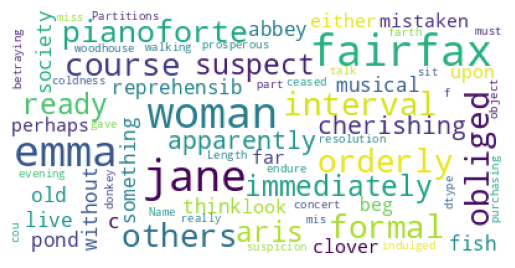


 The most frequent 100 words of book Lewis Carroll



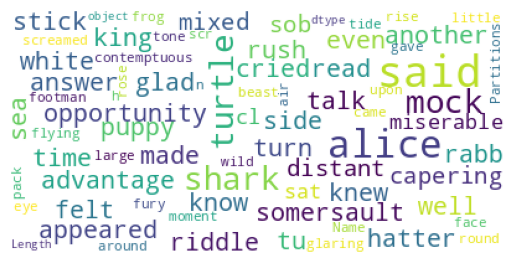


 The most frequent 100 words of book G. K. Chesterton



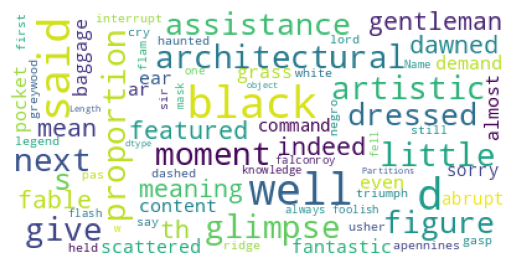


 The most frequent 100 words of book Maria Edgeworth



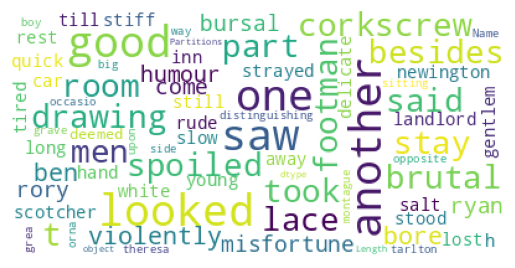


 The most frequent 100 words of book William Shakespeare



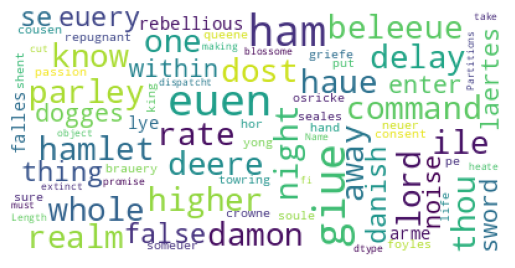

In [12]:
# plot word cloud for the most frequent 50 words in each book  
import wordcloud

for label in df['Book Author'].unique():
  books = df[df["Book Author"]==label]["Partitions"]

  #wordcloud 
  print(f"\n The most frequent 100 words of book {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=100, 
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

In [13]:
# Shuffle the dataset
shuffled_dataset = df.sample(frac=1, random_state=31)

# Reset the index of the shuffled dataset
shuffled_dataset.reset_index(drop=True, inplace=True)

# Display the shuffled dataset
shuffled_dataset


,Partitions,Book Name,Book Label,Book Author
0,twere better assaid therefore proiect haue bac...,Hamlet.txt,e,William Shakespeare
1,still hung entangled tough hedge horse plunged...,Brown.txt,c,G. K. Chesterton
2,cried silence court king put spectacle looked ...,Alice.txt,b,Lewis Carroll
3,wisedome farre beleeue peculiar sect force may...,Hamlet.txt,e,William Shakespeare
4,compasse much musicke excellent voice little o...,Hamlet.txt,e,William Shakespeare
...,...,...,...,...
995,pointed chip scrupled hesitated began talk doc...,Parents.txt,d,Maria Edgeworth
996,throw richer foure successiue king denmarkes c...,Hamlet.txt,e,William Shakespeare
997,asleep feared must decided involvement disinge...,Emma.txt,a,Jane Austen
998,knowledge always one flash foolish mask fell w...,Brown.txt,c,G. K. Chesterton


Feature Engineering

Transformation


In [14]:
def Words_Relations (T_df, T_Name):
    from yellowbrick.text import TSNEVisualizer
    tsne = TSNEVisualizer(title=" Words Relations in"+ T_Name+" transformatiom")
    tsne.fit(T_df,df["Book Author"])
    tsne.show()

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


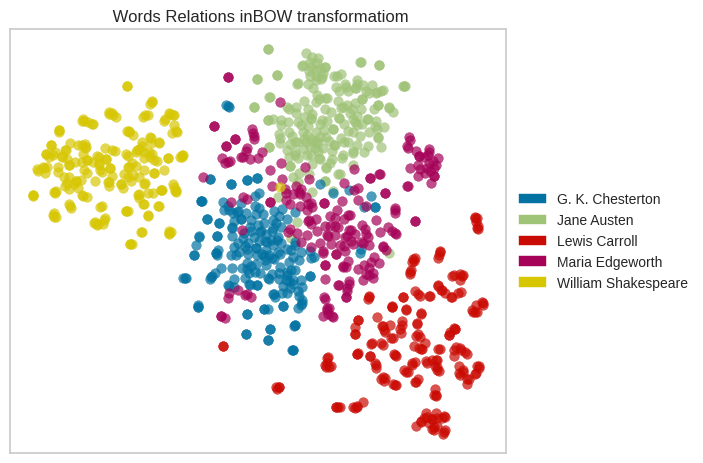

In [15]:
#BOW
count_vectorizer = CountVectorizer()
BOW_vectors = count_vectorizer.fit_transform(df["Partitions"])
feature_names = count_vectorizer.get_feature_names_out()

# Convert the BOW vectors to a dataframe
# Split the BOW dataset into input features X and output labels y
X_BOW = pd.DataFrame(BOW_vectors.toarray(), columns=feature_names)
#Draw Chart showing word Relations
Words_Relations (X_BOW ,"BOW")

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


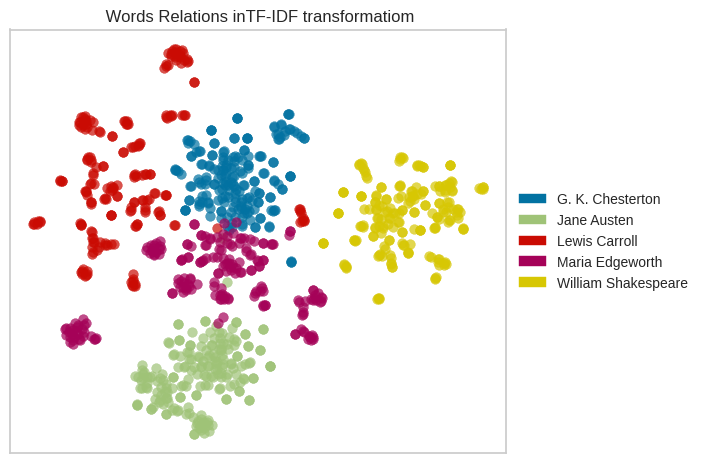

In [16]:
#TF 
# Create the TF-IDF vectors
TFidf_vect = TfidfVectorizer()
TFidf_vectors = TFidf_vect.fit_transform(df["Partitions"])

 # Convert the TF-IDF vectors to a dataframe#
 # Split the TF dataset into input features X and output labels y
X_TF = pd.DataFrame(TFidf_vectors.toarray(), columns=TFidf_vect.get_feature_names_out())

#Draw Chart showing word Relations
Words_Relations (X_TF ,"TF-IDF")

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


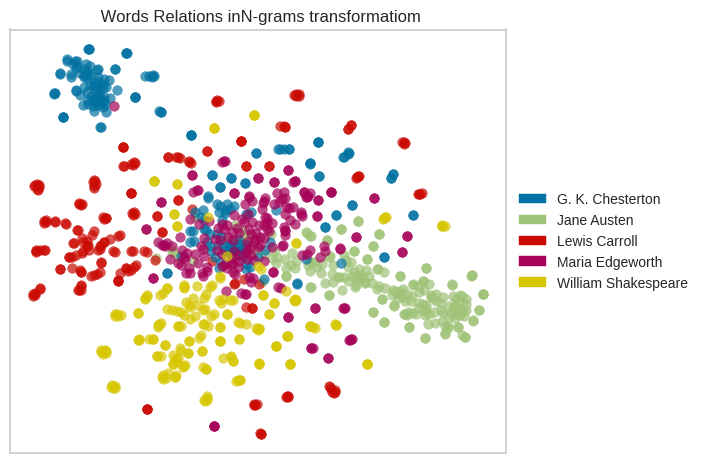

In [17]:
#N grams
# Create the N_grams vectors
vectorizer = CountVectorizer(ngram_range=(2,2))
Ngrams = vectorizer.fit_transform(df["Partitions"])
Ngram_names = vectorizer.get_feature_names_out()

# Convert the N-grams vectors to a dataframe
# Split the N-grams dataset into input features X and output labels y
X_N_grams = pd.DataFrame(Ngrams.toarray(), columns=vectorizer.get_feature_names_out())

#Draw Chart showing word Relations
Words_Relations (X_N_grams ,"N-grams")

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


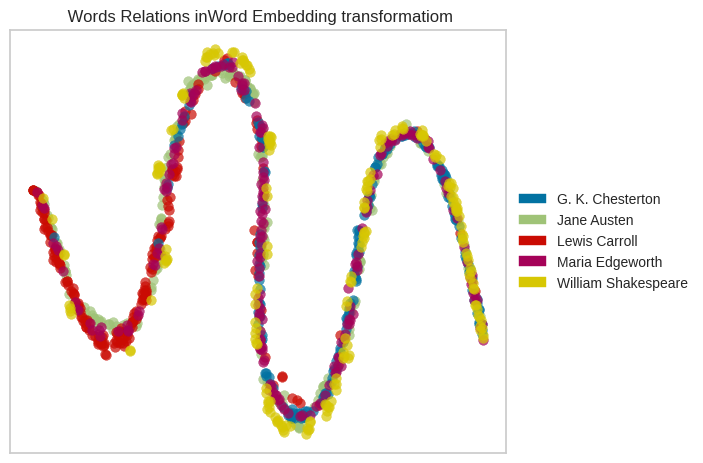

In [18]:
# Train Word2Vec model
sentences = [doc.split() for doc in df["Partitions"]]
embedding_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get word embeddings for BOW vectors
word_embeddings = []
for doc in df["Partitions"]:
    doc_embedding = np.zeros(100)  # Assuming embedding size is 100
    word_count = 0
    for word in doc.split():
        if word in embedding_model.wv:
            doc_embedding += embedding_model.wv[word]
            word_count += 1
    if word_count > 0:
        doc_embedding /= word_count
    word_embeddings.append(doc_embedding)

# Convert word embeddings to a dataframe
X_Word_Embedding = pd.DataFrame(word_embeddings)

#Draw Chart showing word Relations
Words_Relations (X_Word_Embedding ,"Word Embedding")

Encoding

In [19]:
#Encoding y--> Author Name

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Book Author column
y_encoded = label_encoder.fit_transform(df['Book Author'])

# Convert y_encoded to a dataframe
y_encoded_df = pd.DataFrame(y_encoded, columns=['Author_Encoded'])

# Add the original author names column to the dataframe
y_encoded_df['Author_Name'] = df['Book Author']




Modeling & Perform Evaluations&Analysis of Bias and Variability

In [20]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g", label="Cross-validation score")

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
    return plt

In [21]:
 def bias_variance(clf, x_train, x_test, y_train, y_test):
 #label_encoder object knows how to understand word labels.
        label_encoder = preprocessing.LabelEncoder()
        X_train_copy = np.copy(x_train)
        X_test_copy = np.copy(x_test)
        y_train_copy = np.copy(y_train)
        y_test_copy = np.copy(y_test)

        # Predict the labels for training and test data
        y_train_pred = clf.predict(x_train)
        y_test_pred = clf.predict(x_test)

        # Encode the true and predicted labels
        y_train_encoded = label_encoder.fit_transform(y_train_copy)
        y_test_encoded = label_encoder.fit_transform(y_test_copy)
        y_train_pred_encoded = label_encoder.transform(y_train_pred)
        y_test_pred_encoded = label_encoder.transform(y_test_pred)

        # Calculate the average bias
        avg_bias = np.mean((y_train_encoded - y_train_pred_encoded) ** 2)

        # Calculate the average variance
        avg_var = np.mean(np.var(y_train_pred_encoded, axis=0))

        print('Average bias: %.3f' % avg_bias)
        print('Average variance: %.3f' % avg_var)
    

In [22]:
def result_Accuracy (y_test,pred,ModelName): 
  
    conf = confusion_matrix(y_test, pred)
    report = classification_report(y_test, pred)
    acc = round(accuracy_score(y_test, pred)*100, ndigits = 2)

    print (ModelName +"\n\n")
    print(f"Confusion Matrix : \n{conf}")
    print(f"\nClassification Report : \n{report}")
    print(f"\nTesting Accuracy of "+ ModelName + f" is {acc} %")

    return acc

In [23]:
from sklearn.metrics import mean_squared_error
def C_ML_Models(df):
     # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(df, y_encoded_df['Author_Encoded'], test_size=0.15, random_state=42)


    # Classifiers: Support Vector Machine, Rand om Forest, Gaussian Naive Bayes, Bernoulli Naive Bayes,
    # K Nearest Neighbors, XGB Extreme X Gradient Boosting, Stochastic Gradient Descent SGD,
    # Logistic Regression, Decision Tree Classifier, AdaBoost, CatBoost
    classifiers = {
       #"Support Vector Machine SVM": SVC(C=100, gamma=0.002),
       "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Gaussian Naive Bayes": GaussianNB(),
        #"Bernoulli Naive Bayes": BernoulliNB(),
        "K Nearest Neighbors": KNeighborsClassifier(n_neighbors=2),
        #"XGB Extreme X Gradient Boosting": XGBClassifier(use_label_encoder=False),
        #"Stochastic Gradient Descent SGD": SGDClassifier(loss='modified_huber', random_state=42),
        #"Logistic Regression": LogisticRegression(),
        #"Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
        #"AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
        #"Catboost": CatBoostClassifier(iterations=50, random_state=42)
    }

    val_results = {}
    model_results = {}
    y_pred = {}

    for clf_name, clf in classifiers.items():

     # Perform cross-validation
        train_accuracy = cross_val_score(clf, x_train, y_train, cv=10)
        val_results[clf_name] = train_accuracy
        print("Cross_validation Accuracy for",clf_name,":\n", val_results[clf_name])

        #obtain predictions
        clf.fit(x_train ,y_train)
        y_pred = clf.predict(x_test)
        test_accuracy = clf.score(x_test, y_test)

        #Storing the test accuracy
        model_results[clf_name]=test_accuracy

        #generate the report
        report = result_Accuracy(y_test, y_pred, clf_name)

        #calcualte  Average bias ,Average variance
        bias_variance(clf, x_train, x_test, y_train, y_test)
        plot_learning_curve( clf.fit(x_train ,y_train),"Learning Curve of "+ clf_name, x_train, y_train, ylim=(0, 1.1), cv=10, n_jobs=8)

        print("_______________________________________________________________________________________________________________")
      
    # table
    print("#################################################################################################################")
    #Cross-validation Accuracy for Different Models Chart
    plt.figure(figsize=(7, 4))
    plt.bar(val_results.keys(), [np.mean(scores) for scores in val_results.values()], color='red')
    bar_width = 0.2
    plt.xlabel('Model')
    plt.ylabel('Average Accuracy')
    plt.title('Cross-validation Average Accuracy for Different Models')
    plt.xticks(rotation=90)
    plt.show()
    

    #Sorted Table displaying the Accuracy Scores for Different Models
    sorted_Acc = sorted(model_results.items(), key=lambda x: x[1], reverse=True)
    C_df = pd.DataFrame(sorted_Acc, columns=['Model', 'Accuracy_Score'])
    styled_table=C_df.style.background_gradient(cmap='Blues')
    display(styled_table)

    #Accuracy Scores for Different Models
    plt.figure(figsize=(7, 4))
    plt.bar(C_df['Model'], C_df['Accuracy_Score'], color='blue')
    bar_width = 0.2
    plt.xlabel('Model')
    plt.ylabel('Accuracy Score')
    plt.title('Accuracy Scores for Different Models', fontsize=10)
    plt.xticks(rotation=90)
    plt.show()

    print("#################################################################################################################")
    print("Champion Model: ")
    best_classifier = max(model_results, key=model_results.get)
    best_clf =model_results[best_classifier]
    print ( best_classifier,best_clf)

    return C_df,best_classifier,best_clf
      
   
   

#BERT Classification will be in another provided Notebook 

Cross_validation Accuracy for Random Forest :
 [0.98823529 0.97647059 0.97647059 0.97647059 0.94117647 0.97647059
 0.98823529 0.98823529 0.98823529 0.98823529]
Random Forest


Confusion Matrix : 
[[29  0  0  0  0]
 [ 0 26  0  1  0]
 [ 0  0 33  1  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 34]]

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.96      0.98        27
           2       1.00      0.97      0.99        34
           3       0.93      1.00      0.96        26
           4       1.00      1.00      1.00        34

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150


Testing Accuracy of Random Forest is 98.67 %
Average bias: 0.000
Average variance: 1.994
____________________________________________________________________________________________________________

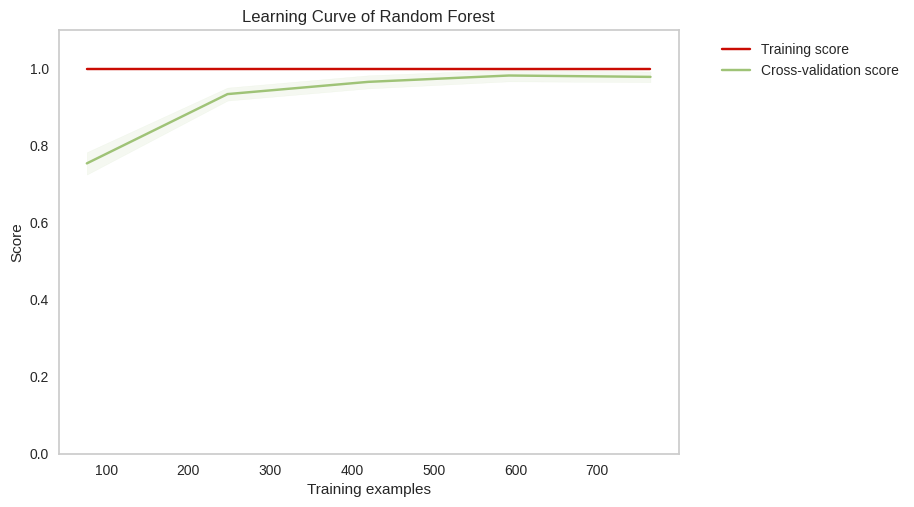

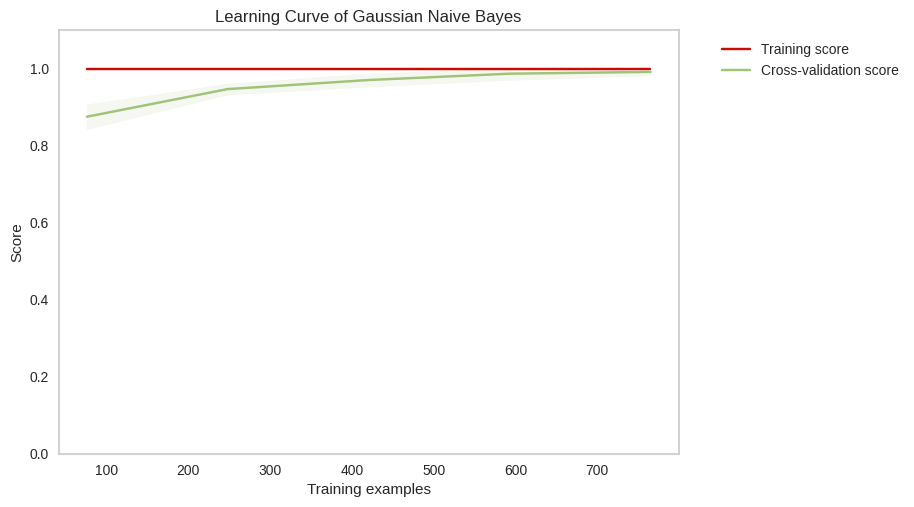

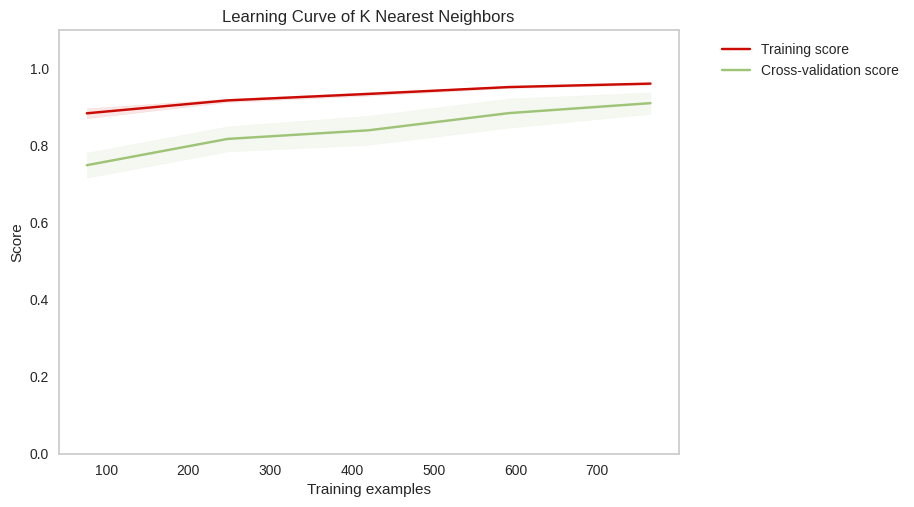

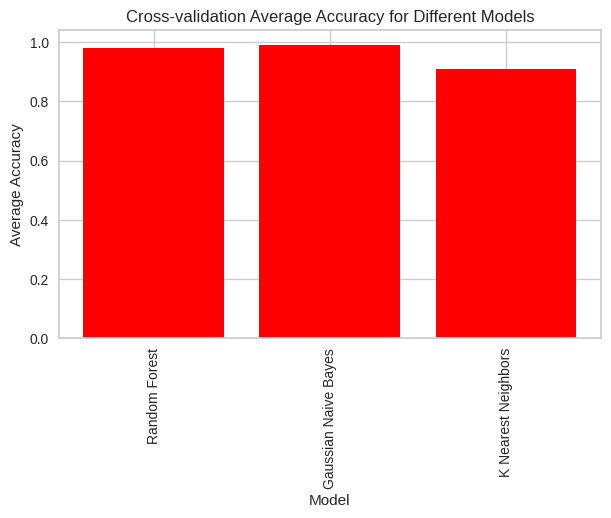

,Model,Accuracy_Score
0,Random Forest,0.986667
1,Gaussian Naive Bayes,0.980000
2,K Nearest Neighbors,0.933333


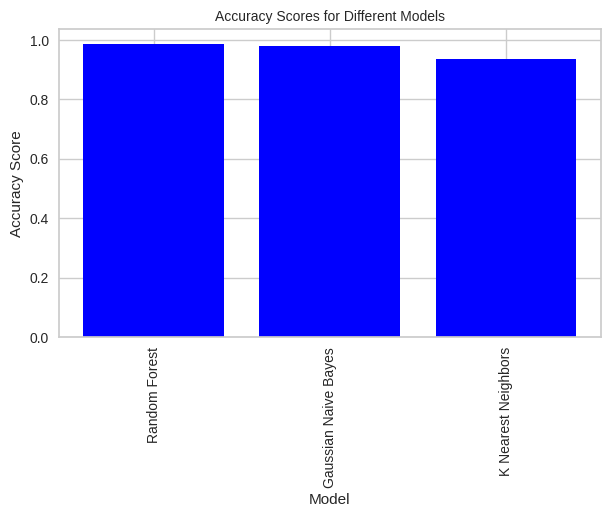

#################################################################################################################
Champion Model: 
Random Forest 0.9866666666666667




In [24]:
BOW_df,BOW_champion_model,BOW_champion_accuaracy=C_ML_Models(X_BOW)
print('\n')


Cross_validation Accuracy for Random Forest :
 [0.96470588 0.96470588 1.         0.98823529 0.97647059 0.95294118
 1.         0.94117647 1.         0.97647059]
Random Forest


Confusion Matrix : 
[[29  0  0  0  0]
 [ 1 24  0  2  0]
 [ 0  0 34  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 34]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.89      0.94        27
           2       1.00      1.00      1.00        34
           3       0.93      1.00      0.96        26
           4       1.00      1.00      1.00        34

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150


Testing Accuracy of Random Forest is 98.0 %
Average bias: 0.000
Average variance: 1.994
_____________________________________________________________________________________________________________

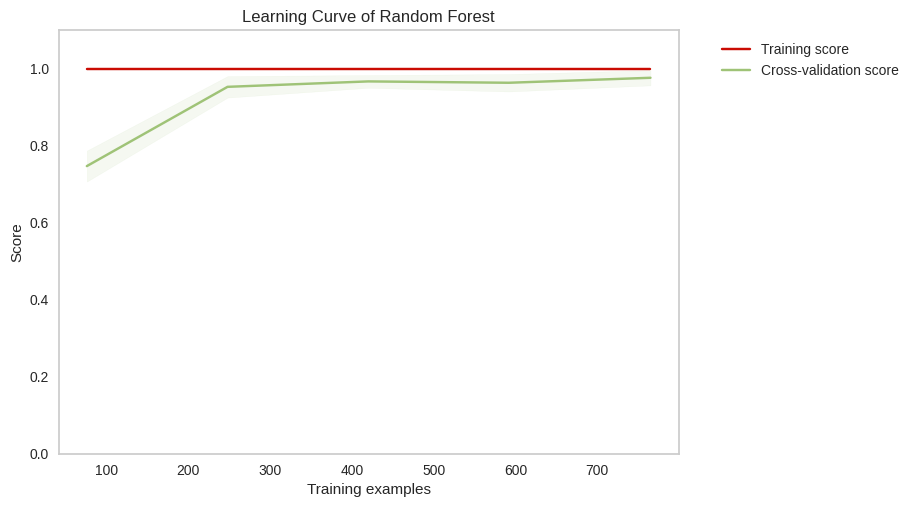

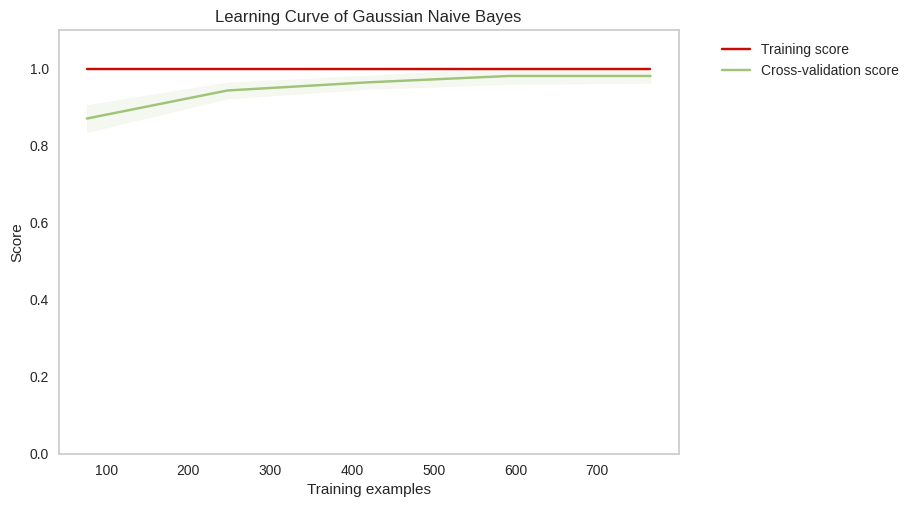

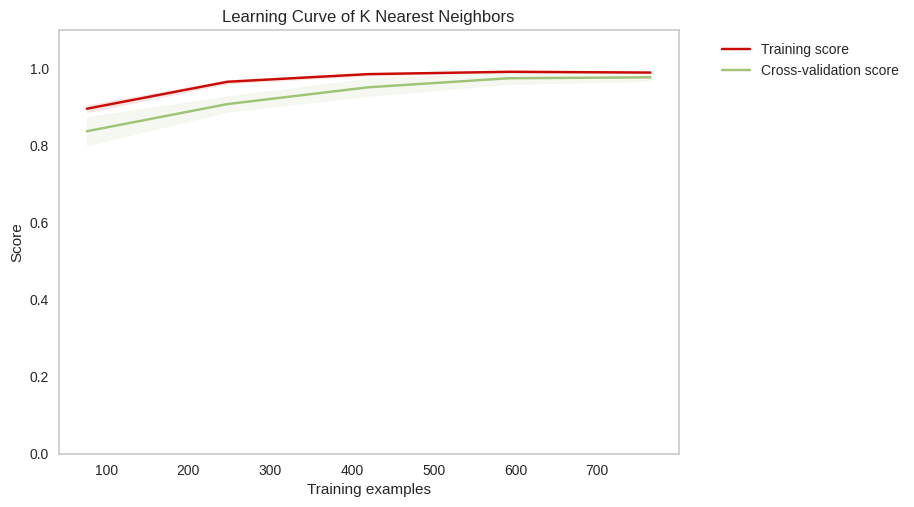

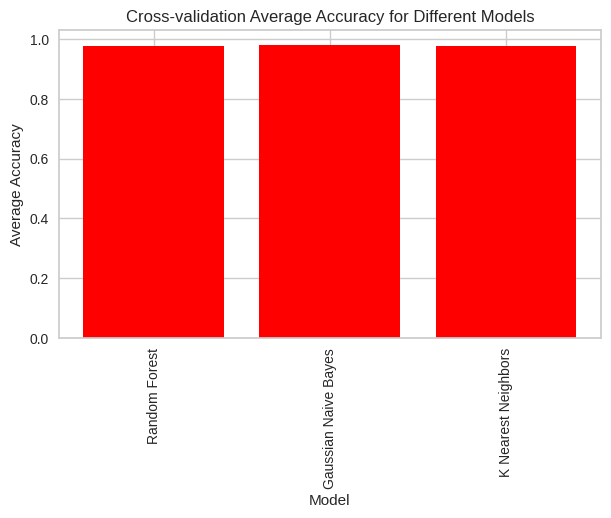

,Model,Accuracy_Score
0,Random Forest,0.980000
1,K Nearest Neighbors,0.980000
2,Gaussian Naive Bayes,0.973333


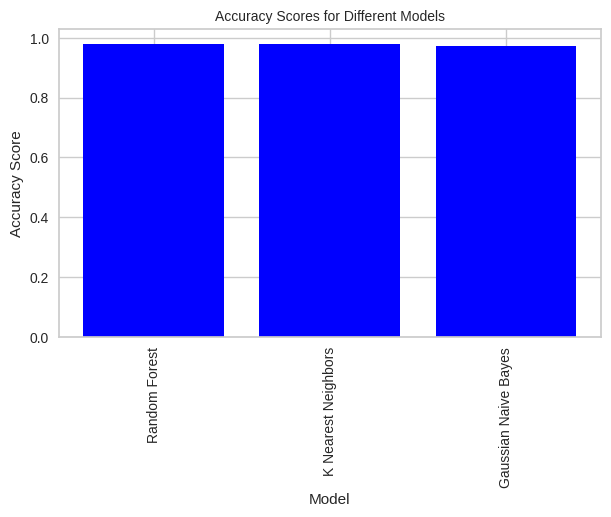

#################################################################################################################
Champion Model: 
Random Forest 0.98




In [25]:
TF_df,TF_champion_model,TF_champion_accuaracy=C_ML_Models(X_TF)
print('\n')


Cross_validation Accuracy for Random Forest :
 [0.84705882 0.82352941 0.77647059 0.81176471 0.76470588 0.82352941
 0.75294118 0.84705882 0.77647059 0.83529412]
Random Forest


Confusion Matrix : 
[[20  0  0  9  0]
 [ 0 20  0  7  0]
 [ 0  0 30  4  0]
 [ 0  0  0 26  0]
 [ 0  0  0  7 27]]

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        29
           1       1.00      0.74      0.85        27
           2       1.00      0.88      0.94        34
           3       0.49      1.00      0.66        26
           4       1.00      0.79      0.89        34

    accuracy                           0.82       150
   macro avg       0.90      0.82      0.83       150
weighted avg       0.91      0.82      0.84       150


Testing Accuracy of Random Forest is 82.0 %
Average bias: 0.000
Average variance: 1.994
_____________________________________________________________________________________________________________

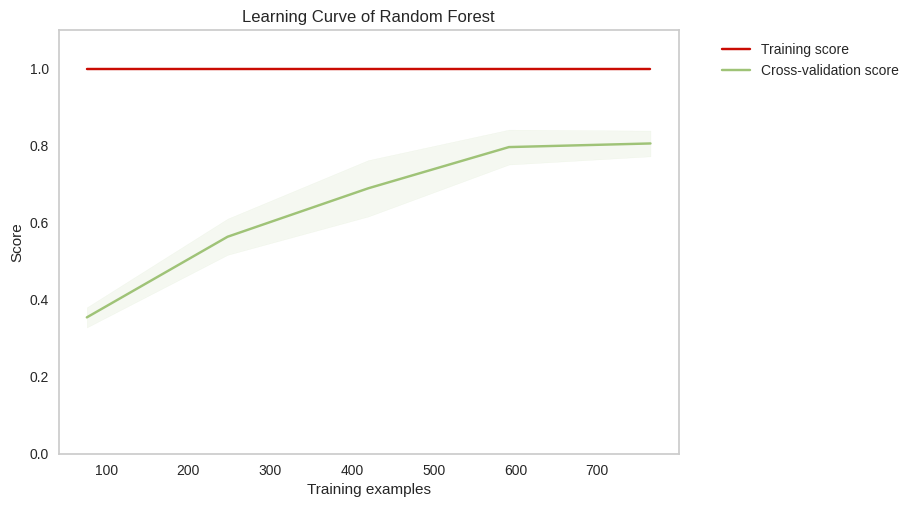

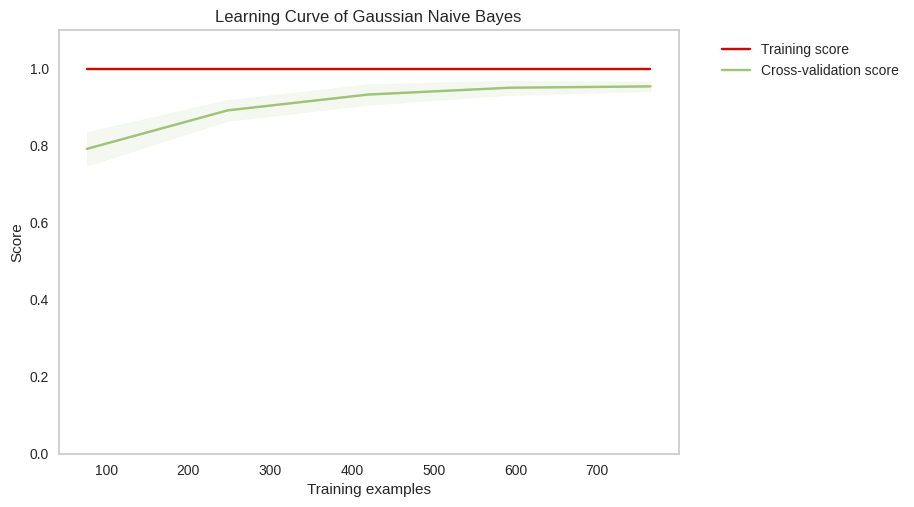

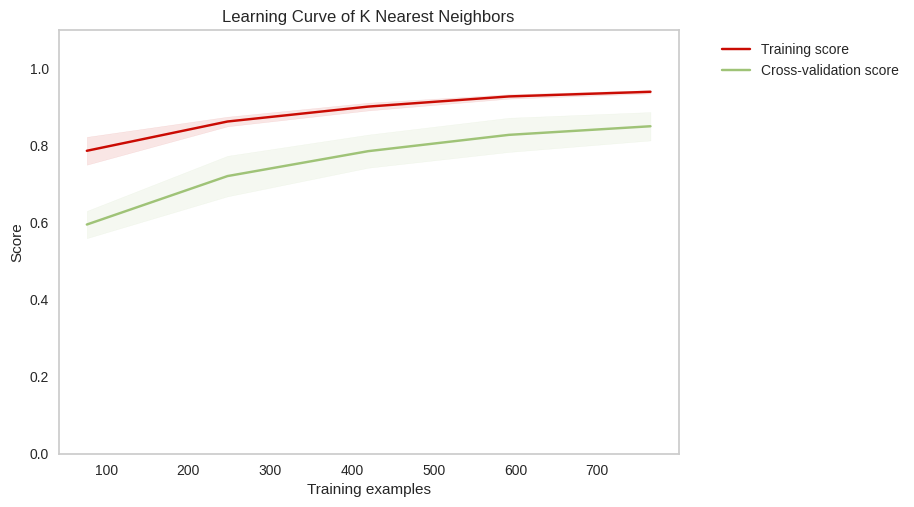

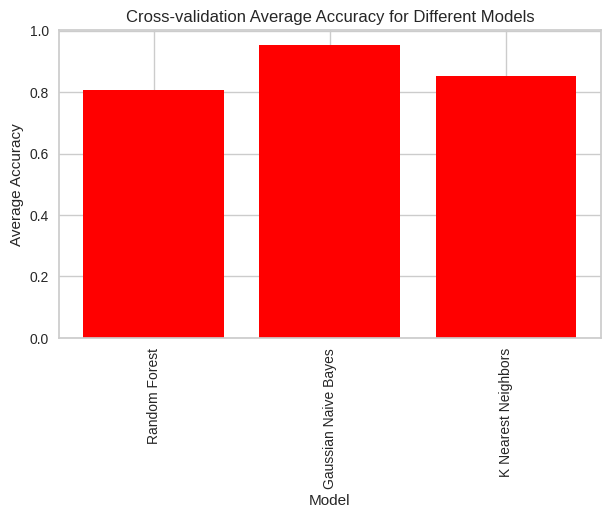

,Model,Accuracy_Score
0,Gaussian Naive Bayes,0.980000
1,K Nearest Neighbors,0.873333
2,Random Forest,0.820000


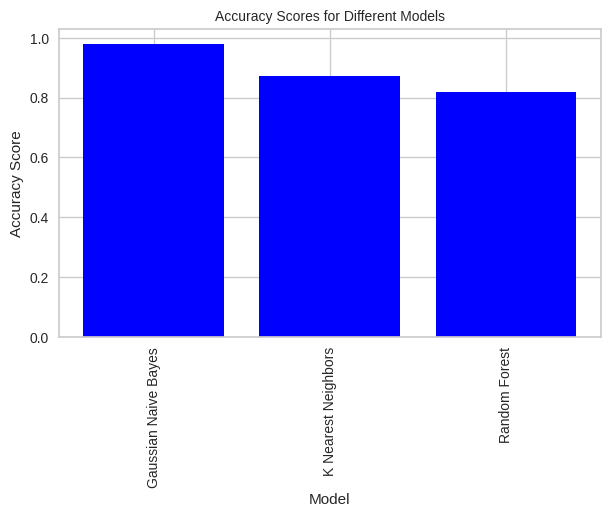

#################################################################################################################
Champion Model: 
Gaussian Naive Bayes 0.98




In [26]:
N_grams_df,N_grams_champion_model,N_grams_champion_accuaracy=C_ML_Models(X_N_grams)
print('\n')


Cross_validation Accuracy for Random Forest :
 [0.76470588 0.77647059 0.77647059 0.78823529 0.70588235 0.81176471
 0.76470588 0.78823529 0.82352941 0.77647059]
Random Forest


Confusion Matrix : 
[[26  1  0  2  0]
 [ 2 22  0  3  0]
 [ 0  0 33  1  0]
 [13  4  0  9  0]
 [ 3  0  0  0 31]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.59      0.90      0.71        29
           1       0.81      0.81      0.81        27
           2       1.00      0.97      0.99        34
           3       0.60      0.35      0.44        26
           4       1.00      0.91      0.95        34

    accuracy                           0.81       150
   macro avg       0.80      0.79      0.78       150
weighted avg       0.82      0.81      0.80       150


Testing Accuracy of Random Forest is 80.67 %
Average bias: 0.000
Average variance: 1.994
____________________________________________________________________________________________________________

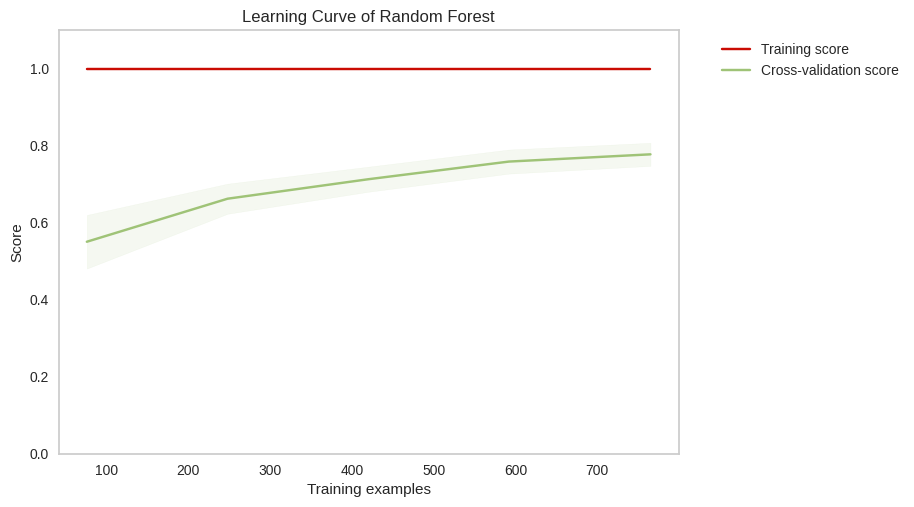

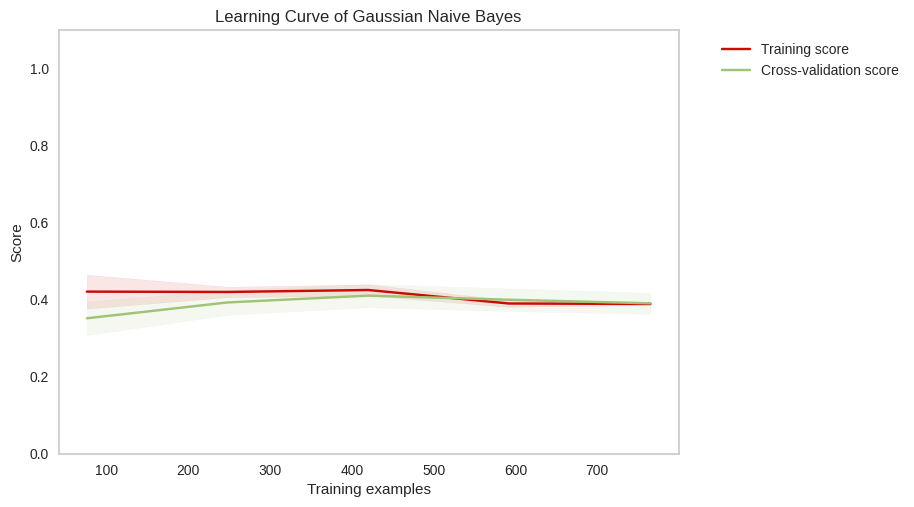

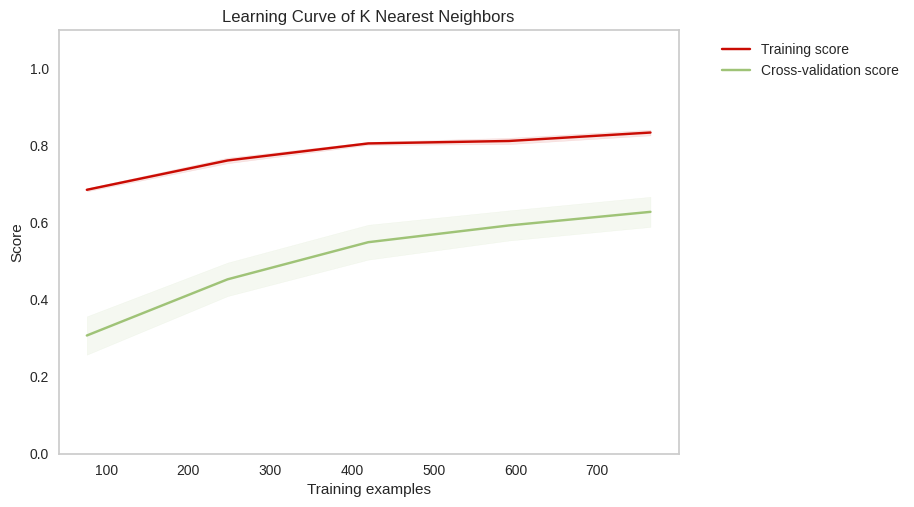

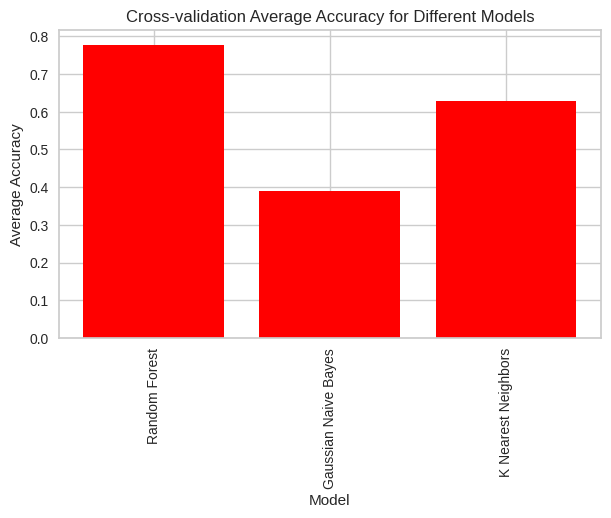

,Model,Accuracy_Score
0,Random Forest,0.806667
1,K Nearest Neighbors,0.706667
2,Gaussian Naive Bayes,0.460000


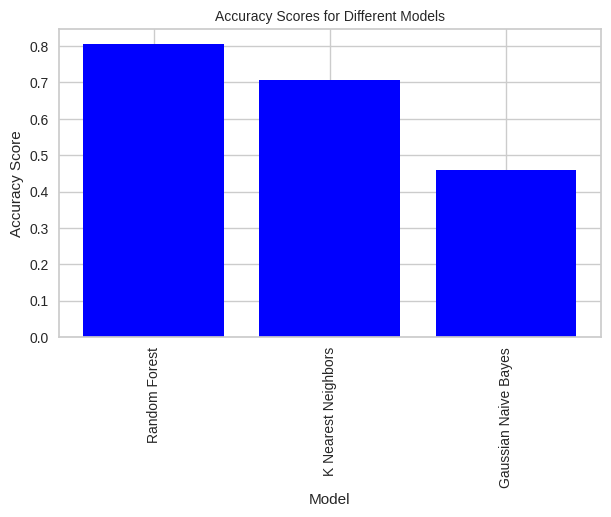

#################################################################################################################
Champion Model: 
Random Forest 0.8066666666666666


In [27]:
X_Word_df,X_Word_champion_model,X_Word_champion_accuaracy=C_ML_Models(X_Word_Embedding)

Compare and decide which algorithm is performing as the champion model

In [28]:
Champion_Model_Name={}
Champion_Model_Name[BOW_champion_model]=[BOW_champion_accuaracy, "BOW"]
Champion_Model_Name[TF_champion_model]=[TF_champion_accuaracy,"TF"]
Champion_Model_Name[N_grams_champion_model]=[N_grams_champion_accuaracy, "N-Grams"]
Champion_Model_Name[X_Word_champion_model]=[X_Word_champion_accuaracy ,"X_WORD"]

best_model = max(Champion_Model_Name, key=Champion_Model_Name.get)
print("Best Model= " +best_model)
print("Accacruy and Champion Embedding:", Champion_Model_Name[best_model])




Best Model= Gaussian Naive Bayes
Accacruy and Champion Embedding: [0.98, 'N-Grams']


Perform ERROR Analysis 

In [29]:
#by reducing the number of words(tokens) it will lead to reduce the accuary of our champion model (RFC) of TF transformation 100%-->84%
for i in [100,70,50,40,30,20] :
    df2=prepareBook(200,i)
   
    #TF 
    # Create the TF-IDF vectors
    TFidf_vect = TfidfVectorizer()
    TFidf_vectors = TFidf_vect.fit_transform(df2["Partitions"])

    # Convert the TF-IDF vectors to a dataframe#
    # Split the TF dataset into input features X and output labels y
    X_TF0 = pd.DataFrame(TFidf_vectors.toarray(), columns=TFidf_vect.get_feature_names_out())
    
    
    # Split the data into train, validation, and test sets
    x_train, x_val, y_train, y_val = train_test_split(X_TF0, y_encoded_df['Author_Encoded'], test_size=0.15, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

    rfg = RandomForestClassifier(n_estimators = 100, random_state = 42) 
    rfg.fit(x_train, y_train)
    rfg_pred = rfg.predict(x_test)  
    acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
    print(f"\nAccuracy with number of words {i} is {acc} %")





Accuracy with number of words 100 is 98.67 %

Accuracy with number of words 70 is 97.33 %

Accuracy with number of words 50 is 94.67 %

Accuracy with number of words 40 is 94.67 %

Accuracy with number of words 30 is 92.0 %

Accuracy with number of words 20 is 84.0 %


it indicate that the n_estimators parameter is not significantly impacting the model's performance on our dataset. 

In [32]:
 #TF 
for i in [100,70,50,40,30,20] :
    # Create the TF-IDF vectors
    TFidf_vect = TfidfVectorizer()
    TFidf_vectors = TFidf_vect.fit_transform(df["Partitions"])

    # Convert the TF-IDF vectors to a dataframe#
    # Split the TF dataset into input features X and output labels y
    X_TF1 = pd.DataFrame(TFidf_vectors.toarray(), columns=TFidf_vect.get_feature_names_out())
    
    
    # Split the data into train, validation, and test sets
    x_train, x_val, y_train, y_val = train_test_split(X_TF1, y_encoded_df['Author_Encoded'], test_size=0.15, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

    rfg = RandomForestClassifier(n_estimators = 100, random_state = 42) 
    rfg.fit(x_train, y_train)
    rfg_pred = rfg.predict(x_test)  
    acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
    print(f"\nAccuracy with n estimators{i} is {acc} %")



Accuracy with n estimators100 is 98.67 %

Accuracy with n estimators70 is 98.67 %

Accuracy with n estimators50 is 98.67 %

Accuracy with n estimators40 is 98.67 %

Accuracy with n estimators30 is 98.67 %

Accuracy with n estimators20 is 98.67 %
